<a href="https://colab.research.google.com/github/rameshbabuatreyu/AI-ML/blob/master/webcrawing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from datetime import date
today=date.today()

In [93]:
d=today.strftime("%m-%d-%y")
print("date =", d)

date = 12-14-20


In [94]:
#cnn_url="https://www.cnn.com/world/live-news/coronavirus-outbreak-{}-intl/index.html".format(d)
NDTV_url="https://www.ndtv.com/latest?pfrom=home-mainnavgation"

In [95]:
print(NDTV_url)

https://www.ndtv.com/latest?pfrom=home-mainnavgation


In [96]:
from bs4 import BeautifulSoup
import requests

In [97]:
html=requests.get(cnn_url).text

In [98]:
soup=BeautifulSoup(html)
print(soup.title)

<title>Latest News: Today's big news headlines from India and around the world - NDTV.com</title>


In [99]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [100]:
for link in soup.find_all("h2"):
  print ("Headline : {}".format(link.text))
  for ent in nlp(link.text).ents:
    print("\tText : {}, Entity : {}".format(ent.text,ent.label_))

Headline : Trending
Headline : 
                                S Jaishankar Defends His Rajya Sabha Election Challenged In Supreme Court                            
Headline : 
                                Cold Winds Sweep Delhi, Temperature Dips To 8.4 Degree                            
	Text : Sweep Delhi, Entity : GPE
	Text : 8.4 Degree, Entity : QUANTITY
Headline : 
                                OnePlus 9 5G Live Images Show Phone From Every Angle, Flat Display and Triple Rear Cameras Spotted: Report                            
Headline : 
                                Apple Said to Be Probing if Wistron Facility in India Flouted Supplier Rules Following Violence: Report                            
	Text : Apple, Entity : ORG
	Text : India, Entity : GPE
Headline : 
                                US Vaccine Campaign Begins With 1st Shipments Delivering Hope To Millions                            
	Text : US Vaccine Campaign, Entity : ORG
	Text : 1st, Entity : ORDINAL
	Text 

Type:2
Creating a Dataset from web table and forming a csv file with collected data

Importing Libraries

In [101]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup


Testing the URL and sending request to grab HTML data

In [102]:
url="https://www.worldometers.info/coronavirus/#countries"
html_page=requests.get(url).text

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 72,647,787 Cases and 1,618,913 Deaths from COVID-19 Virus Pandemic - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link
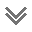

In [103]:
html_page

Beautiful Soup for extracting table data

In [104]:
soup=BeautifulSoup(html_page,'lxml')

Partitioned data

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 72,647,787 Cases and 1,618,913 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/
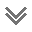

In [105]:
soup

Country wise data

In [106]:
get_table=soup.find("table",id="main_table_countries_today")

In [107]:
get_table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent="Nor

In [108]:
get_table_data=get_table.tbody.find_all("tr")

In [109]:
get_table_data

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>19,319,756</td>
 <td>+8,924</td>
 <td>451,665</td>
 <td>+250</td>
 <td>11,677,251</td>
 <td>+6,785</td>
 <td>7,190,840</td>
 <td>32,678</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="North America" style="display:none;">North America</td>
 <td>
 </td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td>19,089,483</td>
 <td>+5,016</td>
 <td>312,283</td>
 <td>+48</td>
 <td>17,269,985</td>
 <td>+4,075</td>
 <td>1,507,215</td>
 <td>27,403</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" style="display:none;">Asia</td>
 <td>
 </td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data

In [110]:
dicts = {}
for i in range(len(get_table_data)):
  try:
    key = (get_table_data[i].find_all('a', href=True)[0].string)
  except:
    key = (get_table_data[i].find_all('td')[0].string)


In [111]:
value = [j.string for j in get_table_data[i].find_all('td')]
dicts[key] = value

In [112]:
live_data= pd.DataFrame(dicts).drop(0).T.iloc[:,:8]
live_data.columns = ["Total Cases","New Cases", "Total Deaths", "New Deaths", "Total Recovered","Active","Serious Critical","Tot Cases/1M pop"]
live_data.index.name = 'Country'

In [113]:
live_data.iloc[:,:5].to_csv("base_data.csv")

In [114]:
get_corona_data

<function __main__.get_corona_data>

Another method to scrap data 

In [115]:
TOI_url="https://timesofindia.indiatimes.com/home/headlines"
NDTV_url="https://www.ndtv.com/latest?pfrom=home-mainnavgation"

In [116]:
urls=[NDTV_url,TOI_url]
formats=['html.parser','html.parser']
tags=['h2','h2']
website=['NDTV','NBC']

In [117]:
crawl_len=0
for ur in urls:
  print("Crawling webpage....{}".format(ur))

  response=requests.get(ur)
  soup=BeautifulSoup(response.content,formats[crawl_len])
  for link in soup.find_all(tags[crawl_len]):
    if(len(link.text.split(" "))>4):
      print("Headline :{}".format(link.texts))
      entities=[]
      for ent in nlp(link.text).ents:
        print("\tText : {},Entity : {}".format(ent.text,ent.label_))
crawl_len=crawl_len+1



Crawling webpage....https://www.ndtv.com/latest?pfrom=home-mainnavgation
Headline :None
Headline :None
	Text : Sweep Delhi,Entity : GPE
	Text : 8.4 Degree,Entity : QUANTITY
Headline :None
Headline :None
	Text : Apple,Entity : ORG
	Text : India,Entity : GPE
Headline :None
	Text : US Vaccine Campaign,Entity : ORG
	Text : 1st,Entity : ORDINAL
	Text : Millions,Entity : CARDINAL
Headline :None
	Text : UK,Entity : GPE
	Text : Build Spacecraft,Entity : PERSON
	Text : Chase,Entity : ORG
	Text : Map Comet,Entity : PERSON
Headline :None
	Text : NZ,Entity : ORG
	Text : WI,Entity : PERSON
	Text : Jason Holder,Entity : PERSON
	Text : Home Umpires,Entity : WORK_OF_ART
Headline :None
	Text : UPSC Notifies Vacancies In Home Ministry,Entity : ORG
	Text : New Delhi Municipal Council,Entity : ORG
Headline :None
Headline :None
Headline :None
	Text : 4,Entity : CARDINAL
	Text : 2021,Entity : DATE
Headline :None
	Text : Australia,Entity : GPE
	Text : India,Entity : GPE
	Text : Moises Henriques,Entity : PERS

In [118]:
crawl_len=0
new_dict=[]
for ur in urls:
  print("Crawling webpage....{}".format(ur))

  response=requests.get(ur)
  soup=BeautifulSoup(response.content,formats[crawl_len])
  for link in soup.find_all(tags[crawl_len]):
    if(len(link.text.split(" "))>4):
      print("Headline :{}".format(link.texts))
      entities=[]
      entities=[(ent.text,ent.label_)for ent in nlp(link.text).ents]
      new_dict.append({'website':website[crawl_len],"ur":ur,'latest':link.text,'entities':entities})
  crawl_len=crawl_len+1

      

Crawling webpage....https://www.ndtv.com/latest?pfrom=home-mainnavgation
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Crawling webpage....https://timesofindia.indiatimes.com/home/headlines
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None
Headline :None


In [119]:
import pandas as pd
news_df=pd.DataFrame(new_dict)

In [120]:
pd.set_option('max_colwidth',800)
news_df.head(10)

website  ...                                                                               entities
0    NDTV  ...                                  [(Viraataparvam, PERSON), (Rana Daggubati's, PERSON)]
1    NDTV  ...                [(Trump Suggests, ORG), (White House, ORG), (Will Wait Longer, PERSON)]
2    NDTV  ...                                                                                     []
3    NDTV  ...                                           [(Sweep Delhi, GPE), (8.4 Degree, QUANTITY)]
4    NDTV  ...                                                                                     []
5    NDTV  ...                                                           [(Apple, ORG), (India, GPE)]
6    NDTV  ...                     [(US Vaccine Campaign, ORG), (1st, ORDINAL), (Millions, CARDINAL)]
7    NDTV  ...             [(UK, GPE), (Build Spacecraft, PERSON), (Chase, ORG), (Map Comet, PERSON)]
8    NDTV  ...         [(NZ, ORG), (WI, PERSON), (Jason Holder, PERSON), (Home Umpires, WORK_OF_ART)]
9    NDTV  ...  [(UPSC Notifies Vacancies In Home Ministry, ORG), (New Delhi Municipal Council, ORG)]

[10 rows x 4 columns]

In [122]:
pd.concat([news_df[['website','ur','latest']],news_df['entities'].apply(pd.Series)],axis=1)

website  ...                  4
0     NDTV  ...                NaN
1     NDTV  ...                NaN
2     NDTV  ...                NaN
3     NDTV  ...                NaN
4     NDTV  ...                NaN
5     NDTV  ...                NaN
6     NDTV  ...                NaN
7     NDTV  ...                NaN
8     NDTV  ...                NaN
9     NDTV  ...                NaN
10    NDTV  ...                NaN
11    NDTV  ...                NaN
12    NDTV  ...                NaN
13    NDTV  ...  (Test Squad, ORG)
14    NDTV  ...                NaN
15     NBC  ...                NaN
16     NBC  ...                NaN
17     NBC  ...                NaN
18     NBC  ...                NaN
19     NBC  ...                NaN
20     NBC  ...                NaN
21     NBC  ...                NaN
22     NBC  ...                NaN

[23 rows x 8 columns]